In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import train_test_split


In [27]:
data = pd.read_csv(r'C:\Users\Auditics Lap-\Downloads\Weather Data.csv')
data = data.dropna()
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,01-01-2012 00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,01-01-2012 01:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [29]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format = 'mixed', errors = 'coerce' )

data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [57]:
x = data.drop(columns = ['Date/Time','Temp_C','Weather'])
y = data['Temp_C']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('Mean_Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2)




Mean_Error:  0.14135116676152562
Mean Squared Error:  0.06619546727376198
R2 Score:  0.9995208013880571


In [55]:
current_temp = model.predict([[21,83,4,3.2,101.4]])
print('Current Tempreture : ',current_temp,'°C' )
print(f"Predicted Temperature: {current_temp[0]:.2f} °C")


Current Tempreture :  [23.655] °C
Predicted Temperature: 23.66 °C


C:\Intel\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

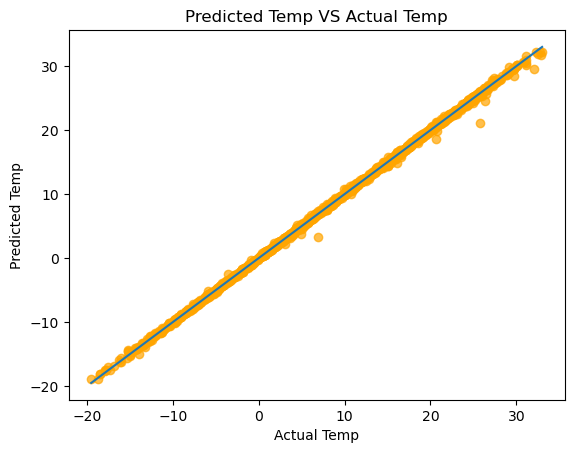

In [69]:
plt.title("Predicted Temp VS Actual Temp")
plt.scatter(y_test,y_pred,alpha = 0.7,color = 'orange')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()])
plt.xlabel("Actual Temp")
plt.ylabel("Predicted Temp")
plt.show
